In [1]:
import os, sys 
sys.path.append('../../gempy/')

In [2]:
import gempy as gp

In [3]:
# Import improved plotting features
from gempy.plot import visualization_2d_pro as vv
from gempy.plot import vista

Active grids: ['regular']
Active grids: ['regular' 'topography']


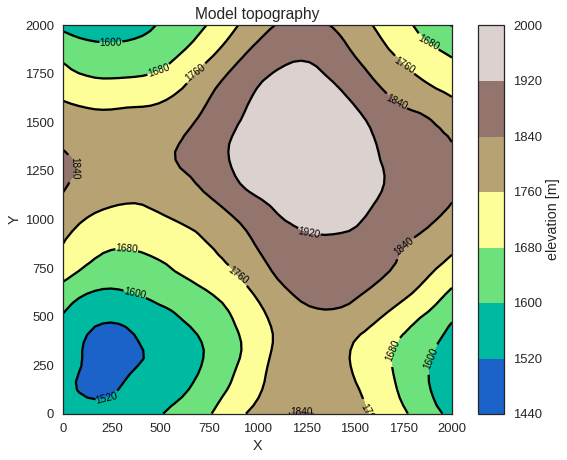

In [5]:
data_path= '../../gempy/notebooks/'
geo_model = gp.create_model('test_topo')

gp.init_data(geo_model, [0,2000.,0,2000.,0,2000.],[50,50,50], 
      path_o = data_path+"/data/input_data/tut_chapter1/simple_fault_model_orientations.csv",
      path_i = data_path+"/data/input_data/tut_chapter1/simple_fault_model_points.csv", default_values=True)
geo_model.set_topography(source='random',fd=1, d_z=np.array([1500,2000]));

In [6]:
# set 3 sections which go North South
section_dict = {'section_SW-NE':([250,250],[1750,1750],[100,100]),
                 'section_NW-SE':([250,1750],[1750,250],[100,100])} 
geo_model.set_section_grid(section_dict)

Active grids: ['regular' 'topography' 'sections']


,start,stop,resolution,dist
section_SW-NE,"[250, 250]","[1750, 1750]","[100, 100]",2121.320344
section_NW-SE,"[250, 1750]","[1750, 250]","[100, 100]",2121.320344


In [7]:
gp.map_series_to_surfaces(geo_model,
                          {"Fault_Series":'Main_Fault', 
                             "Strat_Series": ('Sandstone_2','Siltstone',
                                              'Shale', 'Sandstone_1', 'basement')}, remove_unused_series=True);

In [8]:
geo_model.set_is_fault(['Fault_Series'])

Fault colors changed. If you do not like this behavior, set change_color to False.


,isFault,isFinite
Fault_Series,True,False
Strat_Series,False,False


In [9]:
gp.set_interpolation_data(geo_model,
                          compile_theano=True,
                          theano_optimizer='fast_compile',
                          verbose=[])
sol = gp.compute_model(geo_model, compute_mesh=True, sort_surfaces=False)

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!
Kriging values: 
                  values
range            3464.1
$C_o$            285714
drift equations  [3, 3]


../../gempy/gempy/core/solution.py:288: UserWarning: Attribute error. Using non masked marching cubesmarching_cubes_lewiner() got an unexpected keyword argument 'mask'.
  warnings.warn('Attribute error. Using non masked marching cubes' + str(e)+'.')


In [18]:
sec_name = 'section_NW-SE'

In [19]:
p1 = geo_model.grid.sections.df.loc[sec_name, 'start']
p2 = geo_model.grid.sections.df.loc[sec_name, 'stop']

res = geo_model.grid.regular_grid.resolution[0]
print(p1, p2)

[250, 1750] [1750, 250]


In [21]:
p = gp._plot.plot_2d(geo_model, show_data=False)
test_slice = gp._plot.Plot2D._slice_topo_4_sections(p, p1, p2, res, method='interp2')

<Figure size 748.8x514.8 with 0 Axes>

In [22]:
a = p.add_section(sec_name)
p.plot_lith(a, sec_name)
p.plot_topography(a, sec_name)

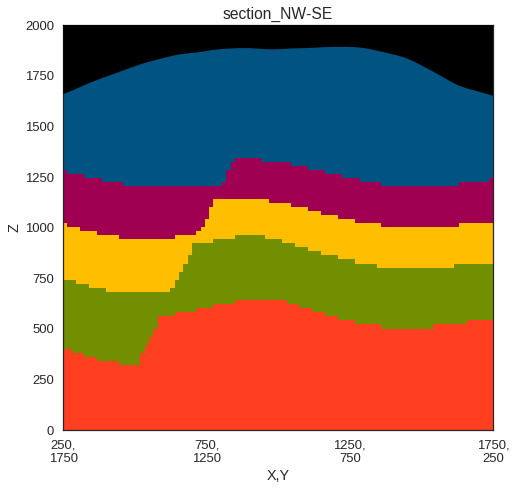

In [23]:
p.fig #interp2 test NW-SE

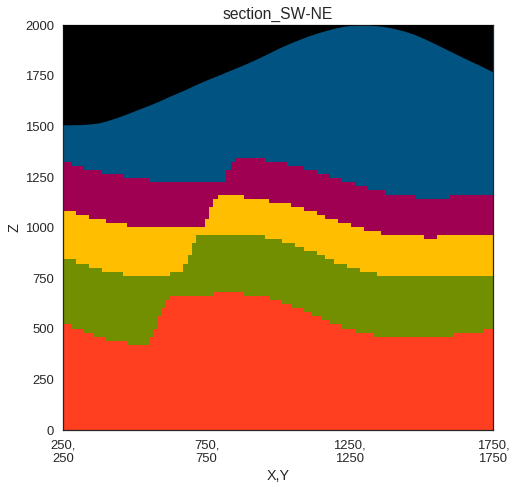

In [17]:
p.fig #spline test

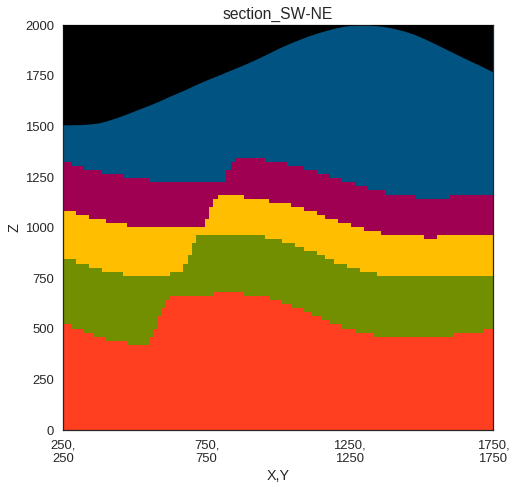

In [14]:
p.fig # interp2 test

In [19]:
xy = geo_model.grid.sections.calculate_line_coordinates_2points(p1, p2, res)

In [20]:
from scipy import interpolate

In [21]:
val3d = geo_model.grid.topography.values_3D

In [22]:
def interpolate_zvals_at_xy(values_3D, xy):
    assert xy[:, 0][0] <= xy[:, 0][-1], 'At the moment, the xy values of the first point must be smaller than second' \
                                        '(fix soon)'
    assert xy[:, 1][0] <= xy[:, 1][-1], 'At the moment, the xy values of the first point must be smaller than second' \
                                        '(fix soon)'
    xj = values_3D[:, :, 0][0, :]
    yj = values_3D[:, :, 1][:, 0]
    zj = values_3D[:, :, 2].T

    f = interpolate.RectBivariateSpline(xj, yj, zj)
    zi = f(xy[:, 0], xy[:, 1])
    return np.diag(zi)

def interpolate_zvals_at_xy_no_assert(values_3D, xy):
   # assert xy[:, 0][0] <= xy[:, 0][-1], 'At the moment, the xy values of the first point must be smaller than second' \
   #                                     '(fix soon)'
   # assert xy[:, 1][0] <= xy[:, 1][-1], 'At the moment, the xy values of the first point must be smaller than second' \
   #                                     '(fix soon)'
    xj = values_3D[:, :, 0][0, :]
    yj = values_3D[:, :, 1][:, 0]
    zj = values_3D[:, :, 2].T

    f = interpolate.RectBivariateSpline(xj, yj, zj)
    
    zi = f(xy[:, 0], xy[:, 1])
    return np.diag(zi)

def interpolate_zvals_at_xy_nw_se(values_3D, xy):
    #assert xy[:, 0][0] <= xy[:, 0][-1], 'At the moment, the xy values of the first point must be smaller than second' \
    #                                    '(fix soon)'
    #assert xy[:, 1][0] <= xy[:, 1][-1], 'At the moment, the xy values of the first point must be smaller than second' \
    #                                    '(fix soon)'
    xj = values_3D[:, :, 0][0, :]
    yj = values_3D[:, :, 1][:, 0]
    zj = values_3D[:, :, 2]
    f = interpolate.interp2d(xj, yj, zj, kind='cubic')
    zi = f(xy[:, 0], xy[:, 1])
    return np.flipud(zi).diagonal() #np.diag(zi)

def interpolate_zvals_at_xy_new(values_3D, xy):
    #assert xy[:, 0][0] <= xy[:, 0][-1], 'At the moment, the xy values of the first point must be smaller than second' \
    #                                    '(fix soon)'
    #assert xy[:, 1][0] <= xy[:, 1][-1], 'At the moment, the xy values of the first point must be smaller than second' \
    #                                    '(fix soon)'
    xj = values_3D[:, :, 0][0, :]
    yj = values_3D[:, :, 1][:, 0]
    zj = values_3D[:, :, 2]
    f = interpolate.interp2d(xj, yj, zj, kind='cubic')
    zi = f(xy[:, 0], xy[:, 1])
    return np.diag(zi)

In [24]:
old_version = interpolate_zvals_at_xy(val3d, xy)

In [25]:
new_version = interpolate_zvals_at_xy_new(val3d, xy)

In [26]:
new_version - old_version

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [27]:
sec2_name = 'section_NW-SE'

In [28]:
p1 = geo_model.grid.sections.df.loc[sec2_name, 'start']
p2 = geo_model.grid.sections.df.loc[sec2_name, 'stop']

res = geo_model.grid.regular_grid.resolution[0]

In [29]:
xy = geo_model.grid.sections.calculate_line_coordinates_2points(p1, p2, res)

In [30]:
val3d = geo_model.grid.topography.values_3D

In [32]:
old_version2 = interpolate_zvals_at_xy(val3d, xy)

AssertionError: At the moment, the xy values of the first point must be smaller than second(fix soon)

In [33]:
new_version2 = interpolate_zvals_at_xy_nw_se(val3d, xy)

In [34]:
new_version2

array([1710.05009259, 1689.37981582, 1669.04381292, 1649.24006419,
       1631.72448985, 1615.76705525, 1598.21717661, 1581.40614535,
       1563.46045885, 1548.48910659, 1538.41283393, 1532.98092822,
       1532.14274398, 1535.7432537 , 1545.90988562, 1560.40283235,
       1576.71543781, 1595.97330674, 1614.44698484, 1632.04381228,
       1649.70437418, 1669.6697274 , 1688.54020001, 1700.56307696,
       1705.5282555 , 1709.78334939, 1716.52445475, 1725.63970575,
       1737.96621282, 1751.55775714, 1767.78316428, 1785.43997542,
       1800.85405629, 1815.75032952, 1829.53654491, 1841.48180012,
       1853.98027035, 1867.30051555, 1879.3145529 , 1893.09109526,
       1908.77439862, 1926.88758871, 1944.93252555, 1957.87142725,
       1967.99945687, 1978.79063455, 1986.6687356 , 1988.82604534,
       1984.6292886 , 1975.46869604])

In [35]:
new_version

array([1819.94679649, 1823.86380681, 1828.01421131, 1832.39188376,
       1840.76318807, 1849.8394753 , 1860.54719589, 1875.16345237,
       1889.33802116, 1899.46005123, 1904.82175703, 1902.80980944,
       1894.74435032, 1881.66615329, 1866.77207401, 1850.40385548,
       1835.86494106, 1823.21649035, 1814.50017153, 1805.63024432,
       1793.19008668, 1776.89389458, 1756.88763375, 1735.21036066,
       1716.24809084, 1698.48724259, 1680.06702509, 1661.81192371,
       1643.30570656, 1623.10986218, 1610.32938779, 1603.16369618,
       1599.7632548 , 1602.75817558, 1608.21482109, 1614.28765983,
       1620.83751626, 1626.83500605, 1634.99826445, 1644.08561529,
       1653.22316009, 1664.30825492, 1677.26061028, 1693.62859604,
       1713.97516921, 1734.9110833 , 1752.68670413, 1769.17580445,
       1786.55653773, 1803.70860784])

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

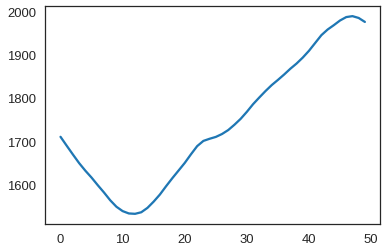

In [37]:
plt.plot(new_version2)

23.964550570676693


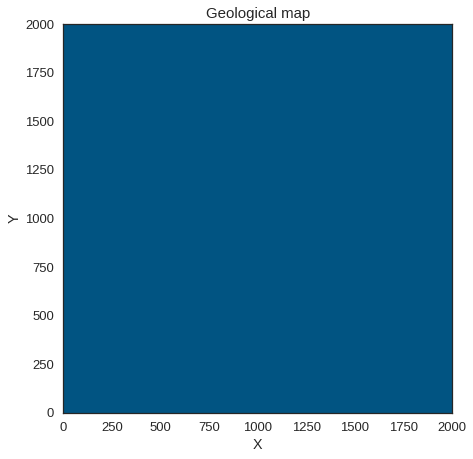

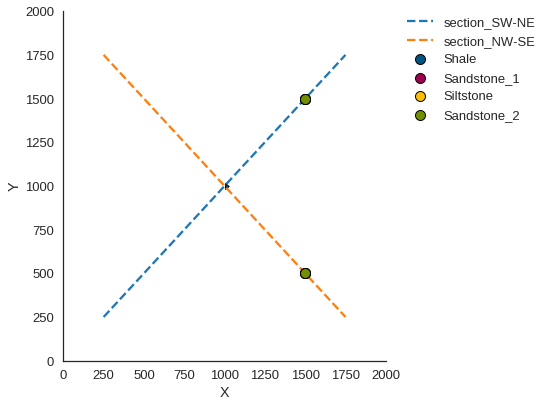

In [58]:
gp.plot.plot_section_traces(geo_model)